In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Load data from directories
scalar_dir = "results_scalar"  # Directory containing scalar CSV files
vector_dir = "results_vector"  # Directory containing vector CSV file

## Scalar CSV 
#### Creation of csv file of all perf's results for scalar executables

In [97]:

# Directory containing the CSV files SCALAR
directory = "results_scalar"  # Change this to your actual directory

# List to hold data from all files
dataframes = []

# Read all CSV files in the directory
# Read all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Standardize columns
        df.columns = ['Value', 'Unit', 'Metric', 'Percentage', 'Count', 'Total', 'Rate', 'Description']
        df.replace('', pd.NA, inplace=True)
        df.dropna(subset=['Value'], inplace=True)
        df['Value'] = pd.to_numeric(df['Value'])
        df['Rate'] = pd.to_numeric(df['Rate'])
        
        # Add dummy index for pivoting
        df['DummyIndex'] = range(len(df))
        
        # Pivot DataFrame
        df_pivot = df.pivot(index='DummyIndex', columns='Metric', values='Value')
        df_pivot = df_pivot.reset_index(drop=True)
        df_pivot.columns.name = None
        
        # Rename metrics for clarity
        translation_dict = {
            'task-clock': 'Task Clock',
            'context-switches': 'Context Switch',
            'cpu-migrations': 'CPU Migration',
            'page-faults': 'Page Faults',
            'cycles': 'Cycles',
            'instructions': 'Instructions',
            'branches': 'Branches',
            'branch-misses': 'Branch Misses'
        }
        df_pivot.rename(columns=translation_dict, inplace=True)
        
        # Extract sparsity and stride from filename
        match = re.search(r"sparsity_(\d+)_stride_(\d+)", filename)
        if match:
            sparsity = int(match.group(1))
            stride = int(match.group(2))
        else:
            sparsity = None
            stride = None
        
        # Add extracted data to DataFrame
        df_pivot['Executable'] = os.path.splitext(filename)[0]
        df_pivot['Sparsity Level'] = sparsity
        df_pivot['Stride'] = stride
        
        dataframes.append(df_pivot)
# Merge all DataFrames into one
final_df = pd.concat(dataframes, ignore_index=True)
# Sort the DataFrame by the 'Executable' column in alphabetical order
final_df_sorted = final_df.sort_values(by='Executable')

# If you want to sort in descending order (Z to A), add the ascending=False parameter
# final_df_sorted = final_df.sort_values(by='Executable', ascending=False)

# Reset the index if you want a fresh index after sorting
final_df_sorted = final_df_sorted.reset_index(drop=True)
name_csv=f"all_{directory}.csv"
final_df_sorted.to_csv(name_csv)
# Display the sorted DataFrame
final_df_sorted

,Branch Misses,Branches,Context Switch,CPU Migration,Cycles,Instructions,Page Faults,Executable,Sparsity Level,Stride
0,13598.0,NaN,NaN,NaN,NaN,NaN,NaN,mlir_sparsity_50_stride_1,50,1
1,NaN,NaN,NaN,NaN,NaN,6489384.0,NaN,mlir_sparsity_50_stride_1,50,1
2,NaN,NaN,NaN,NaN,10065142.0,NaN,NaN,mlir_sparsity_50_stride_1,50,1
3,NaN,NaN,NaN,NaN,NaN,NaN,83.0,mlir_sparsity_50_stride_1,50,1
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,mlir_sparsity_50_stride_1,50,1
...,...,...,...,...,...,...,...,...,...,...
184,13421.0,NaN,NaN,NaN,NaN,NaN,NaN,mlir_sparsity_90_stride_5,90,5
185,NaN,NaN,NaN,0.0,NaN,NaN,NaN,mlir_sparsity_90_stride_5,90,5
186,NaN,NaN,0.0,NaN,NaN,NaN,NaN,mlir_sparsity_90_stride_5,90,5
187,NaN,NaN,NaN,NaN,NaN,NaN,82.0,mlir_sparsity_90_stride_5,90,5


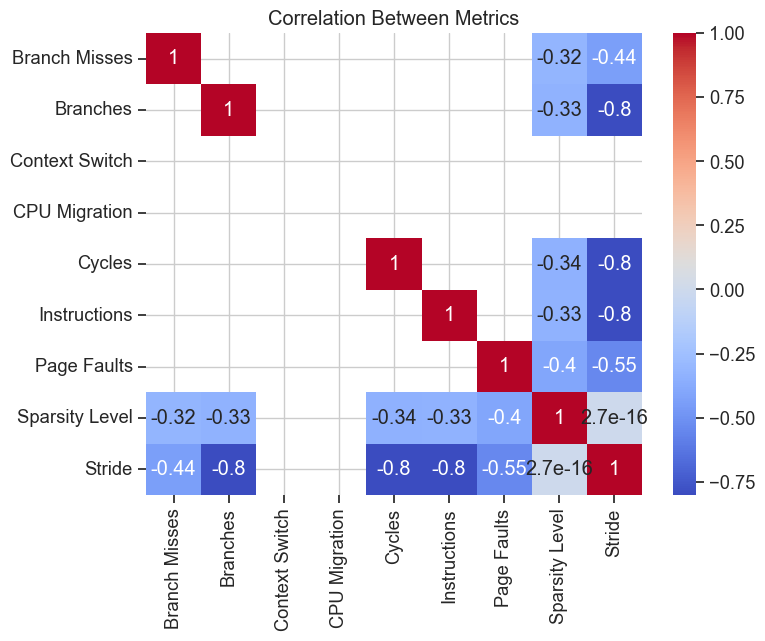

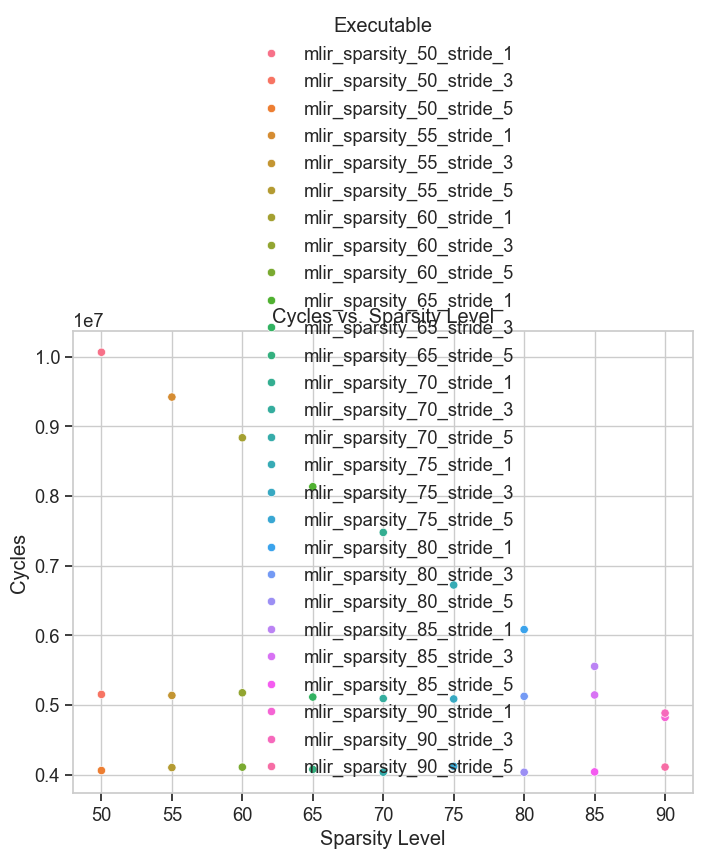

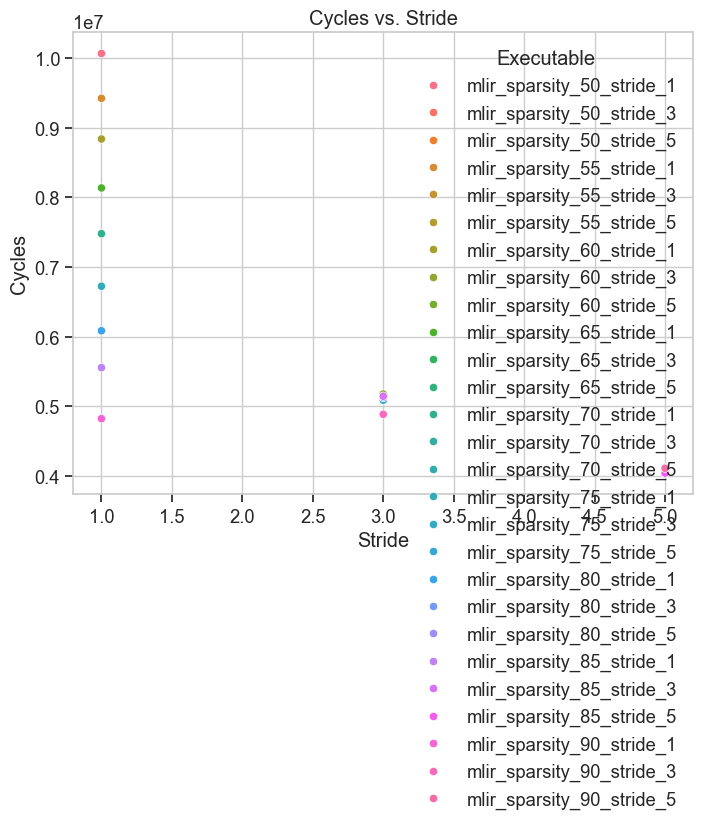

In [98]:

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(final_df_sorted.drop(columns=['Executable']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics")
plt.show()

# Cycles vs Sparsity Level
if 'Sparsity Level' in final_df_sorted.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Sparsity Level', y='Cycles', hue='Executable', data=final_df_sorted)
    plt.title("Cycles vs. Sparsity Level")
    plt.show()

# Cycles vs Stride
if 'Stride' in final_df_sorted.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Stride', y='Cycles', hue='Executable', data=final_df_sorted)
    plt.title("Cycles vs. Stride")
    plt.show()



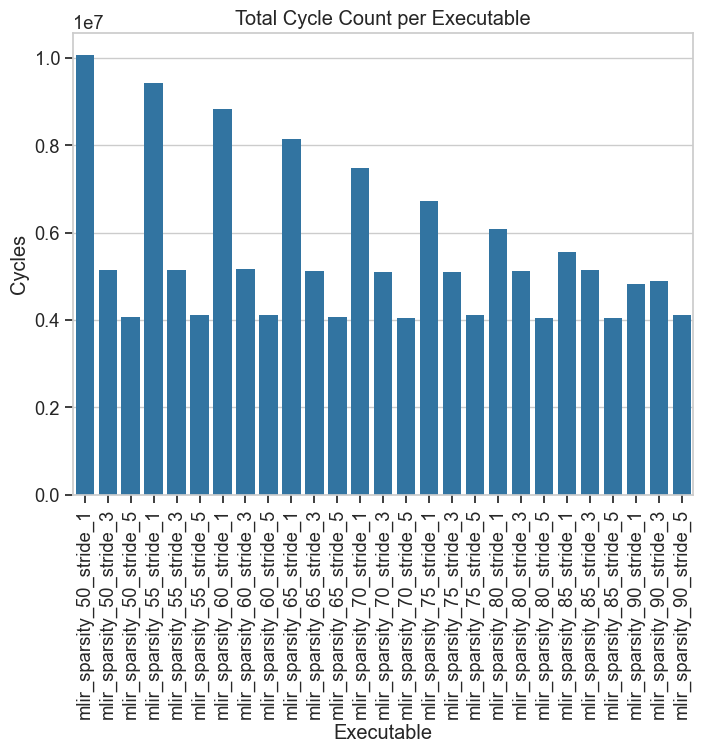

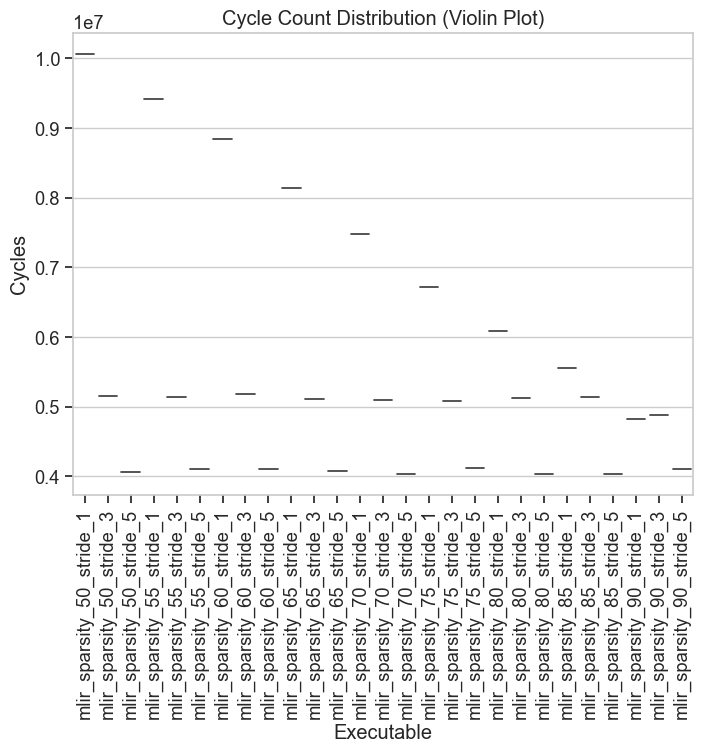

In [99]:
final_df_grouped = final_df.groupby('Executable')['Cycles'].sum().reset_index()

# Bar plot for grouped cycle count
plt.figure(figsize=(8, 6))
sns.barplot(x='Executable', y='Cycles', data=final_df_grouped)
plt.xticks(rotation=90)
plt.title("Total Cycle Count per Executable")
plt.show()

# Violin plot for cycle count distribution
plt.figure(figsize=(8, 6))
sns.violinplot(x='Executable', y='Cycles', data=final_df_sorted)
plt.xticks(rotation=90)
plt.title("Cycle Count Distribution (Violin Plot)")
plt.show()


## Vector CSV 
#### Creation of csv file of all perf's results for vectorized executables

In [100]:

# Directory containing the CSV files VECTOR
directory = "results_vector"  # Change this to your actual directory

# List to hold data from all files
dataframes = []

# Read all CSV files in the directory
# Read all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Standardize columns
        df.columns = ['Value', 'Unit', 'Metric', 'Percentage', 'Count', 'Total', 'Rate', 'Description']
        df.replace('', pd.NA, inplace=True)
        df.dropna(subset=['Value'], inplace=True)
        df['Value'] = pd.to_numeric(df['Value'])
        df['Rate'] = pd.to_numeric(df['Rate'])
        
        # Add dummy index for pivoting
        df['DummyIndex'] = range(len(df))
        
        # Pivot DataFrame
        df_pivot = df.pivot(index='DummyIndex', columns='Metric', values='Value')
        df_pivot = df_pivot.reset_index(drop=True)
        df_pivot.columns.name = None
        
        # Rename metrics for clarity
        translation_dict = {
            'task-clock': 'Task Clock',
            'context-switches': 'Context Switch',
            'cpu-migrations': 'CPU Migration',
            'page-faults': 'Page Faults',
            'cycles': 'Cycles',
            'instructions': 'Instructions',
            'branches': 'Branches',
            'branch-misses': 'Branch Misses'
        }
        df_pivot.rename(columns=translation_dict, inplace=True)
        
        # Extract sparsity and stride from filename
        match = re.search(r"sparsity_(\d+)_stride_(\d+)", filename)
        if match:
            sparsity = int(match.group(1))
            stride = int(match.group(2))
        else:
            sparsity = None
            stride = None
        
        # Add extracted data to DataFrame
        df_pivot['Executable'] = os.path.splitext(filename)[0]
        df_pivot['Sparsity Level'] = sparsity
        df_pivot['Stride'] = stride
        
        dataframes.append(df_pivot)
# Merge all DataFrames into one
final_df = pd.concat(dataframes, ignore_index=True)
# Sort the DataFrame by the 'Executable' column in alphabetical order
final_df_sorted = final_df.sort_values(by='Executable')

# If you want to sort in descending order (Z to A), add the ascending=False parameter
# final_df_sorted = final_df.sort_values(by='Executable', ascending=False)

# Reset the index if you want a fresh index after sorting
final_df_sorted = final_df_sorted.reset_index(drop=True)
name_csv=f"all_{directory}.csv"
final_df_sorted.to_csv(name_csv)
# Display the sorted DataFrame
final_df_sorted

,Branch Misses,Branches,Context Switch,CPU Migration,Cycles,Instructions,Page Faults,Executable,Sparsity Level,Stride
0,13567.0,NaN,NaN,NaN,NaN,NaN,NaN,mlir_sparsity_50_stride_1,50,1
1,NaN,NaN,NaN,NaN,NaN,1721731.0,NaN,mlir_sparsity_50_stride_1,50,1
2,NaN,NaN,NaN,NaN,6685955.0,NaN,NaN,mlir_sparsity_50_stride_1,50,1
3,NaN,NaN,NaN,NaN,NaN,NaN,83.0,mlir_sparsity_50_stride_1,50,1
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,mlir_sparsity_50_stride_1,50,1
...,...,...,...,...,...,...,...,...,...,...
184,13396.0,NaN,NaN,NaN,NaN,NaN,NaN,mlir_sparsity_90_stride_5,90,5
185,NaN,NaN,NaN,0.0,NaN,NaN,NaN,mlir_sparsity_90_stride_5,90,5
186,NaN,NaN,0.0,NaN,NaN,NaN,NaN,mlir_sparsity_90_stride_5,90,5
187,NaN,NaN,NaN,NaN,NaN,NaN,82.0,mlir_sparsity_90_stride_5,90,5


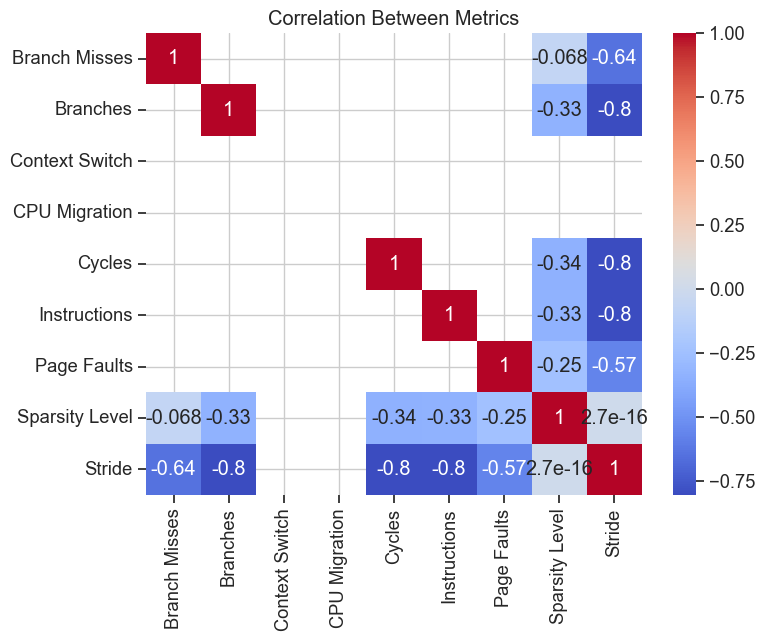

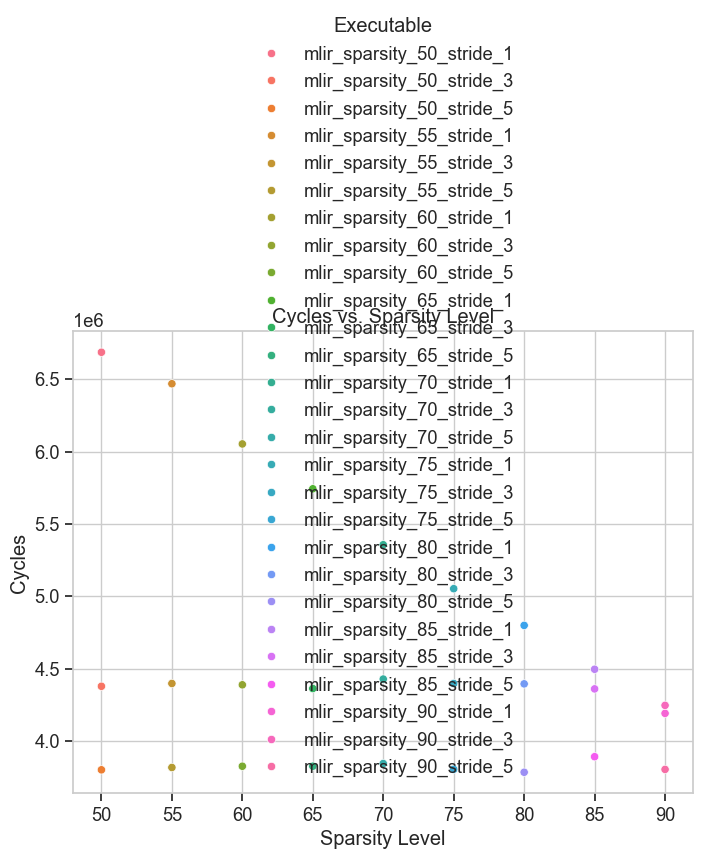

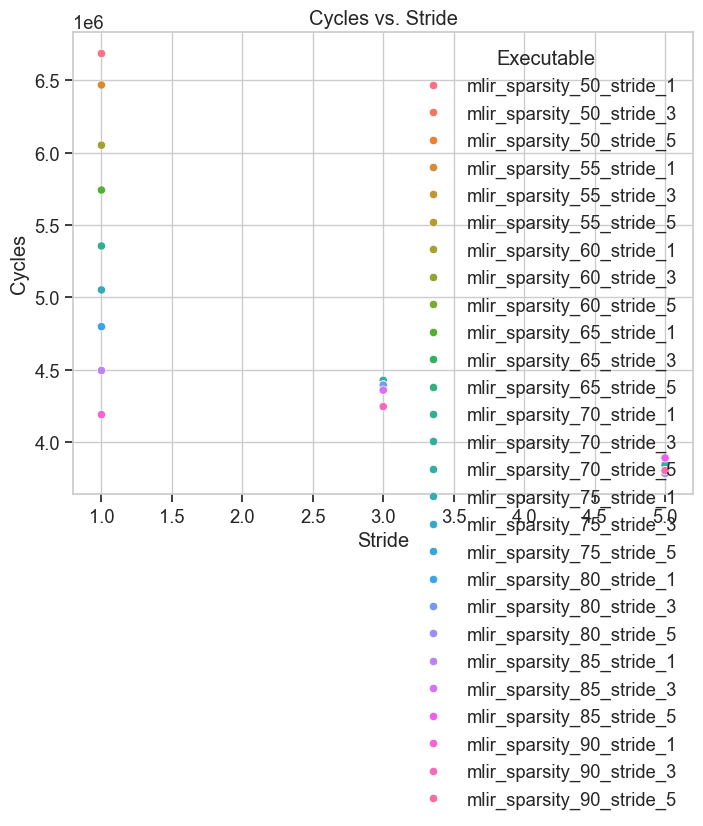

In [101]:

# Visualization

plt.figure(figsize=(8, 6))
sns.heatmap(final_df_sorted.drop(columns=['Executable']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics")
plt.show()

# Cycles vs Sparsity Level
if 'Sparsity Level' in final_df_sorted.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Sparsity Level', y='Cycles', hue='Executable', data=final_df_sorted)
    plt.title("Cycles vs. Sparsity Level")
    plt.show()

# Cycles vs Stride
if 'Stride' in final_df_sorted.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Stride', y='Cycles', hue='Executable', data=final_df_sorted)
    plt.title("Cycles vs. Stride")
    plt.show()



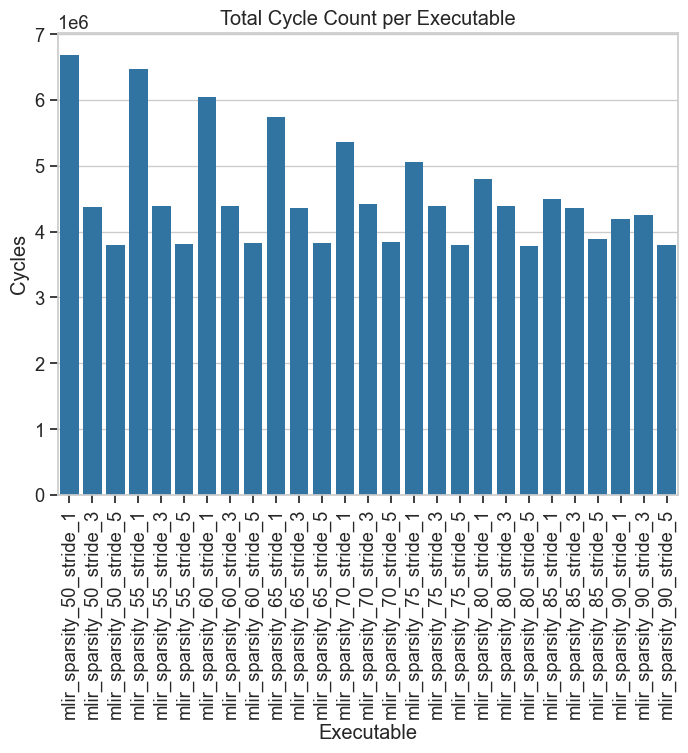

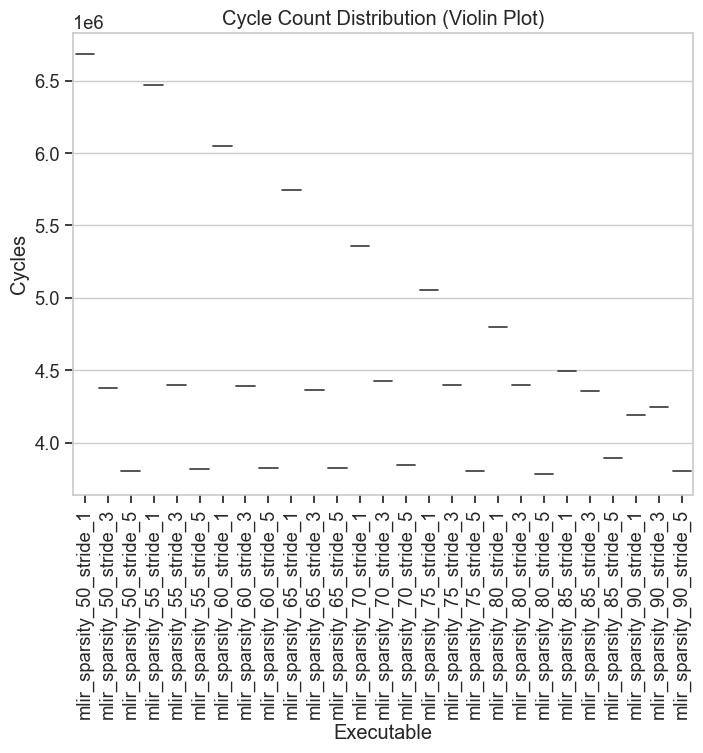

In [102]:
final_df_grouped = final_df.groupby('Executable')['Cycles'].sum().reset_index()

# Bar plot for grouped cycle count
plt.figure(figsize=(8, 6))
sns.barplot(x='Executable', y='Cycles', data=final_df_grouped)
plt.xticks(rotation=90)
plt.title("Total Cycle Count per Executable")
plt.show()

# Violin plot for cycle count distribution
plt.figure(figsize=(8, 6))
sns.violinplot(x='Executable', y='Cycles', data=final_df_sorted)
plt.xticks(rotation=90)
plt.title("Cycle Count Distribution (Violin Plot)")
plt.show()



Loading and processing data...
Calculating speedup metrics...
Performing statistical analysis...
Generating plots...

Summary of Analysis:
1. Average cycles speedup (scalar/vector): 1.20x
2. Average instructions speedup: 2.13x
3. Average cycles - Vector: 4540172.37, Scalar: 5546390.56
4. Best cycles speedup: 1.51x at Sparsity=50.0%, Stride=1.0
5. Worst cycles speedup: 1.04x at Sparsity=85.0%, Stride=5.0
6. High sparsity (>=80%) - Vector: 4218068.89, Scalar: 4867865.22, Ratio: 1.15x
7. Low sparsity (<=60%) - Vector: 4867964.89, Scalar: 6229832.22, Ratio: 1.28x
8. High stride (>=4) - Vector: 3821549.78, Scalar: 4077646.22, Ratio: 1.07x
9. Low stride (<=2) - Vector: 5426818.33, Scalar: 7458601.78, Ratio: 1.37x

Analysis complete. All results saved to the 'analysis_output' directory.


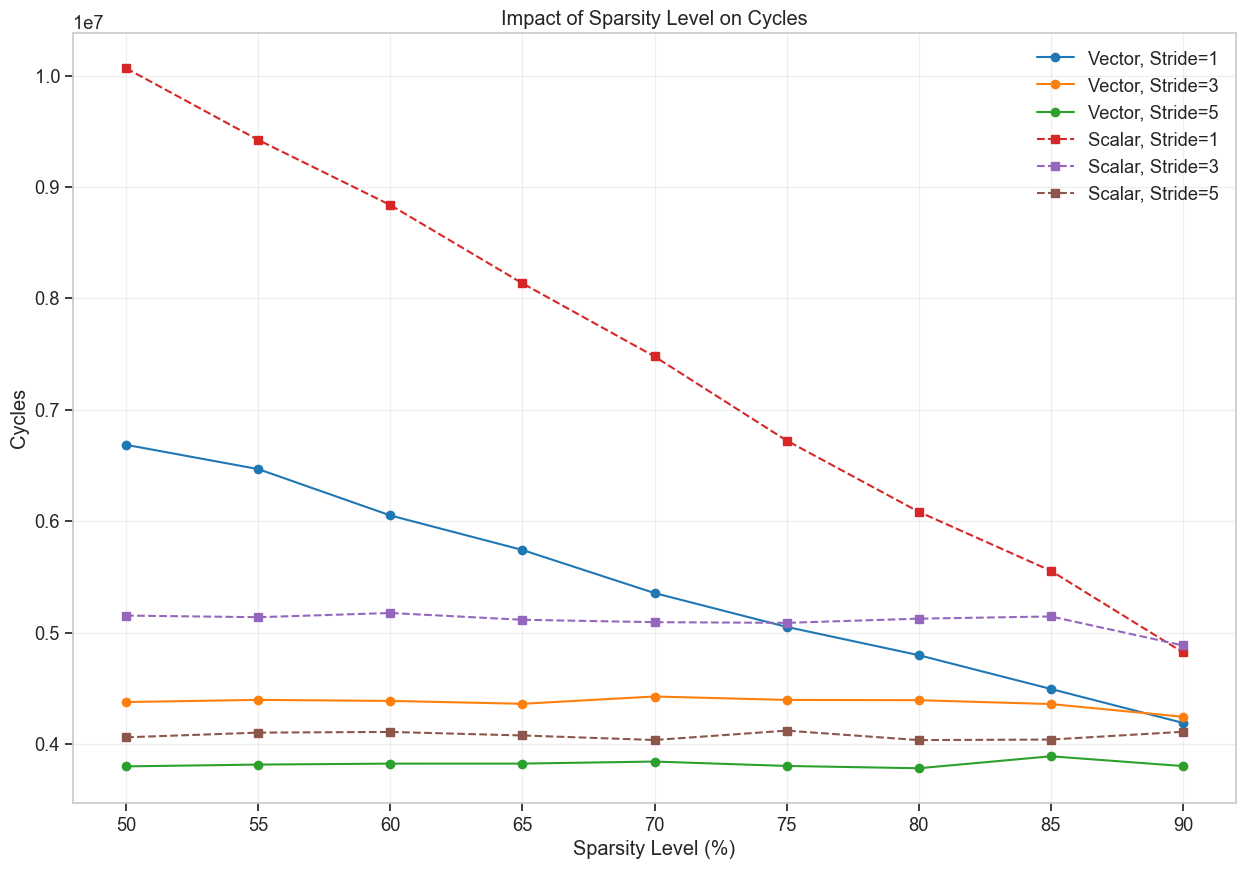

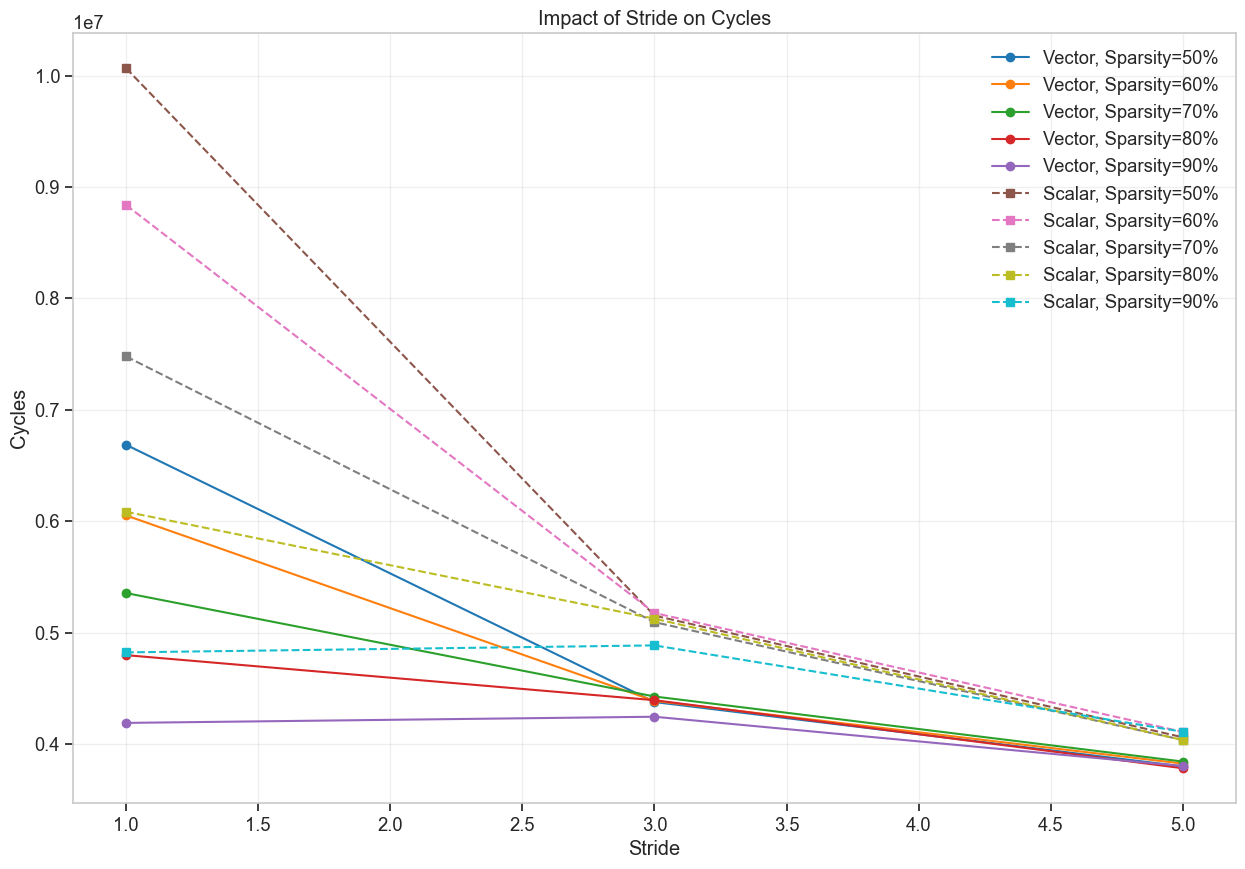

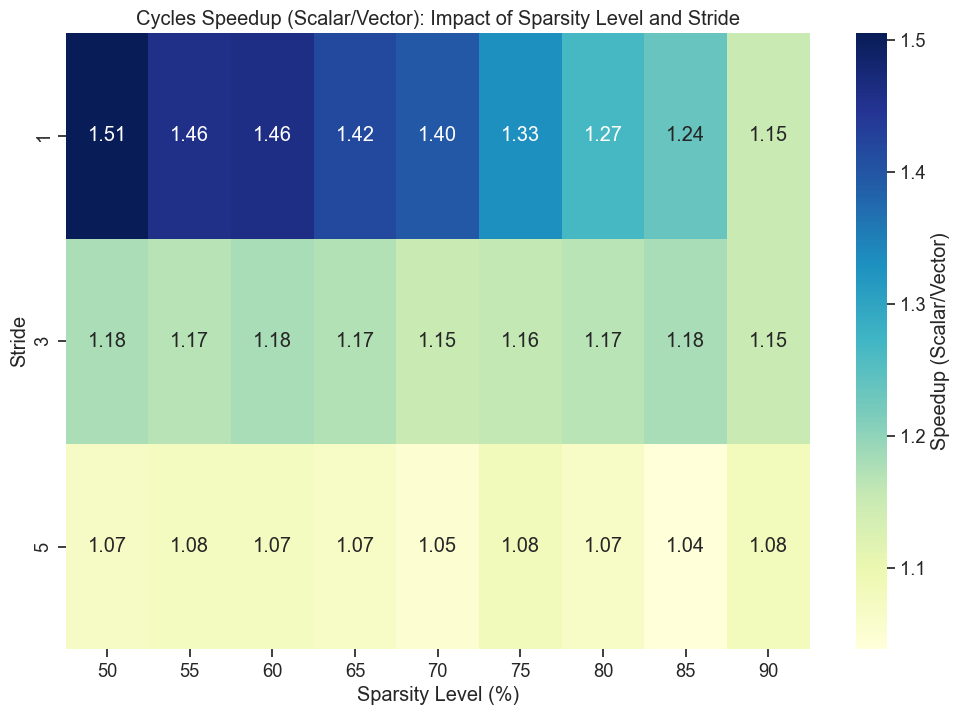

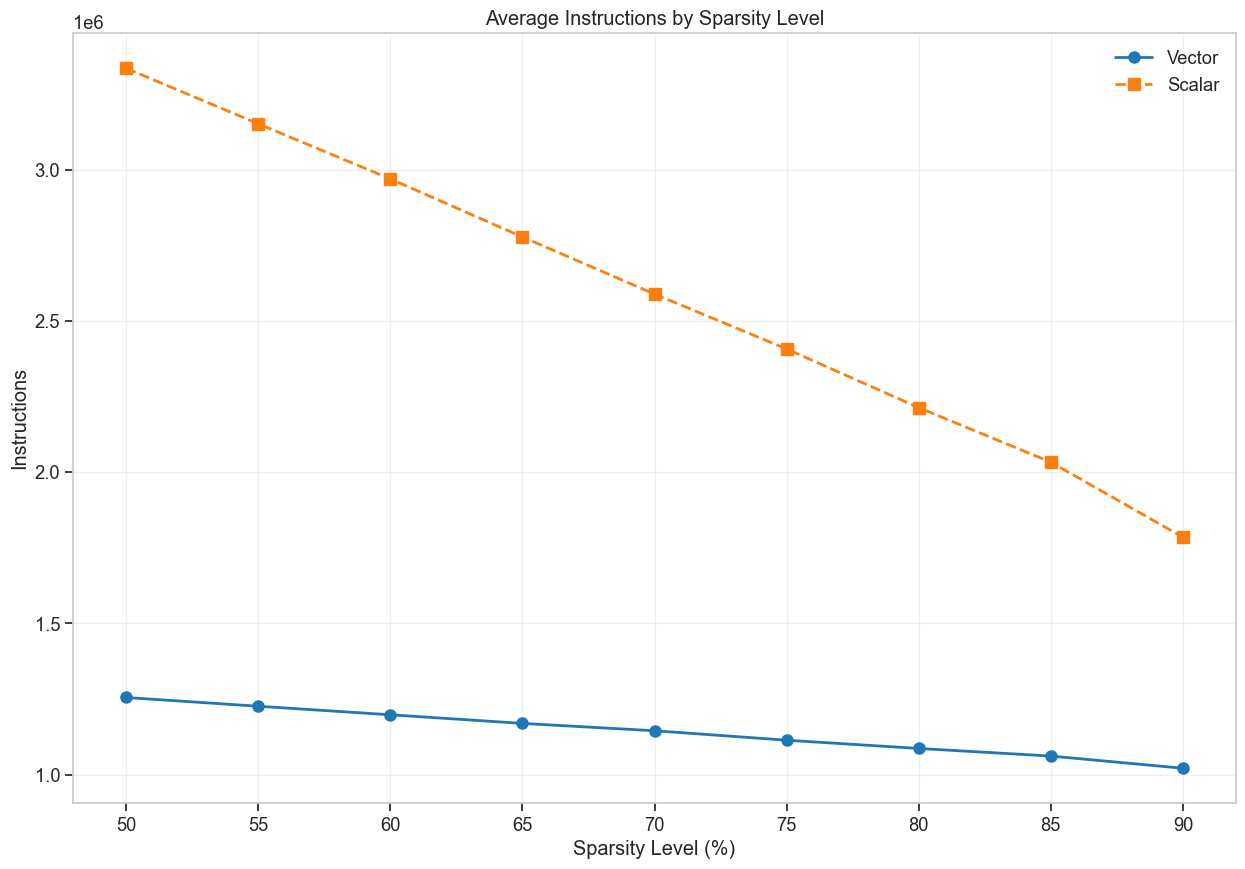

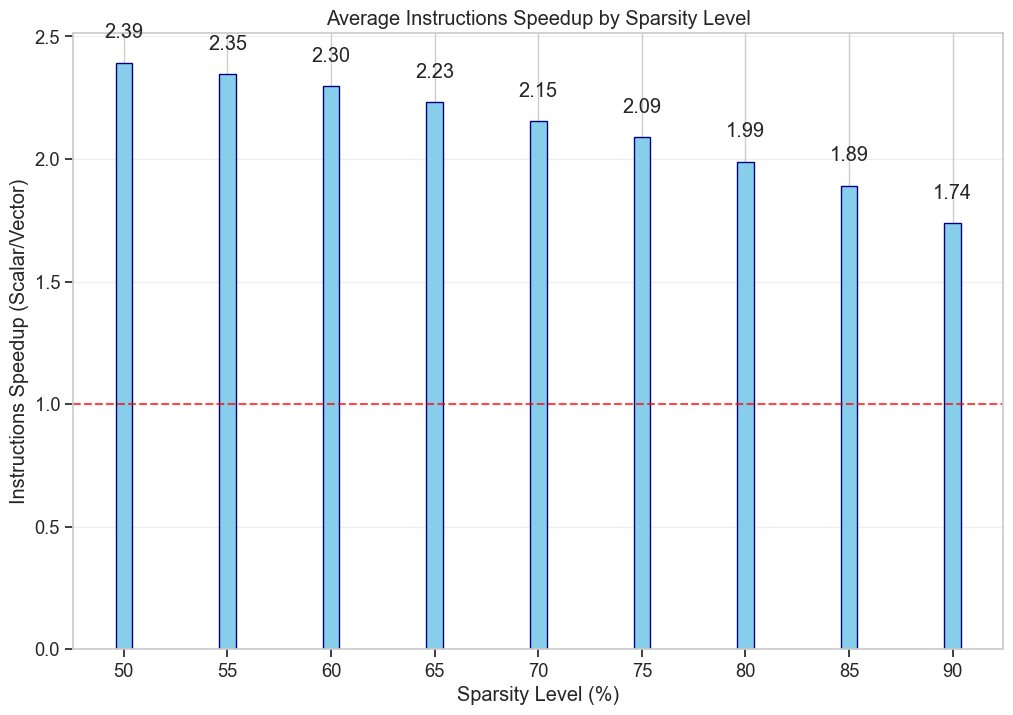

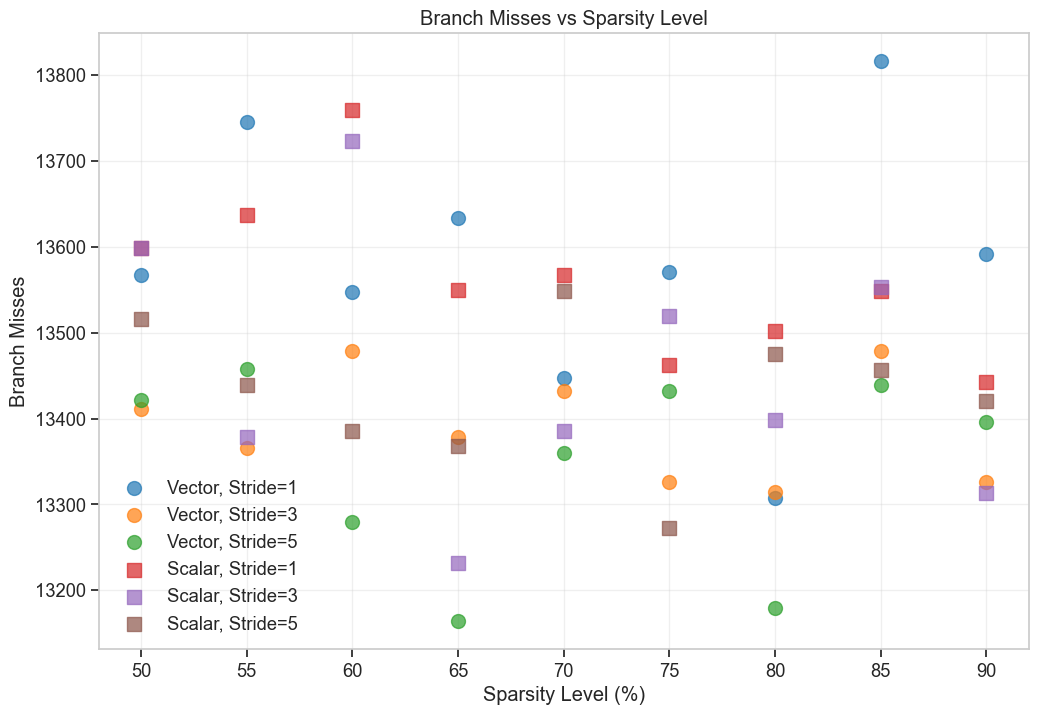

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Define the data processing functions
def load_and_process_data(vector_file, scalar_file):
    """
    Load and process the vector and scalar data from CSV files.
    
    Parameters:
    vector_file (str): Path to the vector CSV file
    scalar_file (str): Path to the scalar CSV file
    
    Returns:
    tuple: (vector_df, scalar_df, combined_df)
    """
    # Load the CSV files
    vector_raw = pd.read_csv(vector_file)
    scalar_raw = pd.read_csv(scalar_file)
    
    # Add a column to identify the source
    vector_raw['Implementation'] = 'Vector'
    scalar_raw['Implementation'] = 'Scalar'
    
    # The data is stored in a sparse format where each row has only one metric value
    # Let's reshape it to have one row per experiment
    
    def reshape_df(df):
        # Initialize dictionary to store results
        results = {}
        
        # Extract unique combinations of Executable, Sparsity Level, and Stride
        unique_exps = df[['Executable', 'Sparsity Level', 'Stride']].drop_duplicates()
        
        # For each unique experiment
        for _, exp in unique_exps.iterrows():
            exe = exp['Executable']
            sparsity = exp['Sparsity Level']
            stride = exp['Stride']
            
            # Create a key for this experiment
            key = (exe, sparsity, stride)
            results[key] = {'Executable': exe, 
                           'Sparsity Level': sparsity, 
                           'Stride': stride,
                           'Implementation': df['Implementation'].iloc[0]}
            
            # Find all rows for this experiment
            mask = ((df['Executable'] == exe) & 
                   (df['Sparsity Level'] == sparsity) & 
                   (df['Stride'] == stride))
            
            # For each metric, find the corresponding value
            for metric in ['Branch Misses', 'Branches', 'Context Switch', 'CPU Migration', 
                          'Cycles', 'Instructions', 'Page Faults']:
                metric_row = df[mask & ~df[metric].isna()]
                if len(metric_row) > 0:
                    results[key][f'{metric}_value'] = metric_row[metric].iloc[0]
        
        # Convert results to DataFrame
        return pd.DataFrame(list(results.values()))
    
    # Reshape both dataframes
    vector_df = reshape_df(vector_raw)
    scalar_df = reshape_df(scalar_raw)
    
    # Combine them
    combined_df = pd.concat([vector_df, scalar_df], ignore_index=True)
    
    return vector_df, scalar_df, combined_df

def calculate_speedup(vector_df, scalar_df):
    """
    Calculate speedup of vector implementation over scalar.
    
    Parameters:
    vector_df (DataFrame): Vector processed dataframe
    scalar_df (DataFrame): Scalar processed dataframe
    
    Returns:
    DataFrame: Speedup metrics
    """
    # Merge on Sparsity Level and Stride
    merged = pd.merge(vector_df, scalar_df, 
                     on=['Sparsity Level', 'Stride'],
                     suffixes=('_vector', '_scalar'))
    
    # Calculate speedup metrics
    merged['cycles_speedup'] = merged['Cycles_value_scalar'] / merged['Cycles_value_vector']
    merged['instructions_speedup'] = merged['Instructions_value_scalar'] / merged['Instructions_value_vector']
    merged['branches_speedup'] = merged['Branches_value_scalar'] / merged['Branches_value_vector']
    
    return merged[['Sparsity Level', 'Stride', 'cycles_speedup', 
                  'instructions_speedup', 'branches_speedup']]

def perform_statistical_analysis(combined_df):
    """
    Perform statistical analysis to determine significance of relationships.
    """
    results = {}
    
    # For vector implementation
    vector_data = combined_df[combined_df['Implementation'] == 'Vector']
    
    # Correlation between sparsity and cycles for vector
    corr_sparsity_cycles_v = stats.pearsonr(
        vector_data['Sparsity Level'], vector_data['Cycles_value'])
    results['Vector Sparsity-Cycles Correlation'] = {
        'r': corr_sparsity_cycles_v[0],
        'p-value': corr_sparsity_cycles_v[1]
    }
    
    # Correlation between stride and cycles for vector
    corr_stride_cycles_v = stats.pearsonr(
        vector_data['Stride'], vector_data['Cycles_value'])
    results['Vector Stride-Cycles Correlation'] = {
        'r': corr_stride_cycles_v[0],
        'p-value': corr_stride_cycles_v[1]
    }
    
    # For scalar implementation
    scalar_data = combined_df[combined_df['Implementation'] == 'Scalar']
    
    # Correlation between sparsity and cycles for scalar
    corr_sparsity_cycles_s = stats.pearsonr(
        scalar_data['Sparsity Level'], scalar_data['Cycles_value'])
    results['Scalar Sparsity-Cycles Correlation'] = {
        'r': corr_sparsity_cycles_s[0],
        'p-value': corr_sparsity_cycles_s[1]
    }
    
    # Correlation between stride and cycles for scalar
    corr_stride_cycles_s = stats.pearsonr(
        scalar_data['Stride'], scalar_data['Cycles_value'])
    results['Scalar Stride-Cycles Correlation'] = {
        'r': corr_stride_cycles_s[0],
        'p-value': corr_stride_cycles_s[1]
    }
    
    # T-test comparing cycles between vector and scalar implementations
    vector_cycles = vector_data['Cycles_value']
    scalar_cycles = scalar_data['Cycles_value']
    ttest_result = stats.ttest_ind(vector_cycles, scalar_cycles)
    results['Vector vs Scalar Cycles T-test'] = {
        't-statistic': ttest_result[0],
        'p-value': ttest_result[1]
    }
    
    return results

def main():
    """
    Main function to execute the analysis.
    """
    # File paths - update these with your actual file paths
    vector_file = 'all_results_vector.csv'
    scalar_file = 'all_results_scalar.csv'
    
    # Create output directory for plots if it doesn't exist
    output_dir = 'analysis_output'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Load and process data
    print("Loading and processing data...")
    vector_df, scalar_df, combined_df = load_and_process_data(vector_file, scalar_file)
    
    # Calculate speedup
    print("Calculating speedup metrics...")
    speedup_df = calculate_speedup(vector_df, scalar_df)
    
    # Perform statistical analysis
    print("Performing statistical analysis...")
    stats_results = perform_statistical_analysis(combined_df)
    
    # Generate plots
    print("Generating plots...")
    
    # Plot 1: Sparsity Impact
    plt.figure(figsize=(15, 10))
    for implementation in ['Vector', 'Scalar']:
        for stride in [1, 3, 5]:
            subset = combined_df[(combined_df['Implementation'] == implementation) & 
                                (combined_df['Stride'] == stride)]
            plt.plot(subset['Sparsity Level'], subset['Cycles_value'], 
                    marker='o' if implementation == 'Vector' else 's',
                    linestyle='-' if implementation == 'Vector' else '--',
                    label=f"{implementation}, Stride={stride}")
    
    plt.title('Impact of Sparsity Level on Cycles')
    plt.xlabel('Sparsity Level (%)')
    plt.ylabel('Cycles')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/sparsity_impact_on_cycles.png", dpi=300, bbox_inches='tight')
    
    # Plot 2: Stride Impact
    plt.figure(figsize=(15, 10))
    for implementation in ['Vector', 'Scalar']:
        for sparsity in [50, 60, 70, 80, 90]:
            subset = combined_df[(combined_df['Implementation'] == implementation) & 
                                (combined_df['Sparsity Level'] == sparsity)]
            plt.plot(subset['Stride'], subset['Cycles_value'], 
                    marker='o' if implementation == 'Vector' else 's',
                    linestyle='-' if implementation == 'Vector' else '--',
                    label=f"{implementation}, Sparsity={sparsity}%")
    
    plt.title('Impact of Stride on Cycles')
    plt.xlabel('Stride')
    plt.ylabel('Cycles')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/stride_impact_on_cycles.png", dpi=300, bbox_inches='tight')
    
    # Plot 3: Speedup Heatmap for Cycles
    plt.figure(figsize=(12, 8))
    pivot_df = speedup_df.pivot(index='Stride', columns='Sparsity Level', values='cycles_speedup')
    sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", 
               cbar_kws={'label': 'Speedup (Scalar/Vector)'})
    plt.title('Cycles Speedup (Scalar/Vector): Impact of Sparsity Level and Stride')
    plt.xlabel('Sparsity Level (%)')
    plt.ylabel('Stride')
    plt.savefig(f"{output_dir}/cycles_speedup_heatmap.png", dpi=300, bbox_inches='tight')
    
    # Plot 4: Instructions Comparison
    plt.figure(figsize=(15, 10))
    for implementation in ['Vector', 'Scalar']:
        grouped = combined_df[combined_df['Implementation'] == implementation].groupby('Sparsity Level')['Instructions_value'].mean()
        plt.plot(grouped.index, grouped.values, 
                marker='o' if implementation == 'Vector' else 's',
                linestyle='-' if implementation == 'Vector' else '--',
                linewidth=2, markersize=8,
                label=f"{implementation}")
    
    plt.title('Average Instructions by Sparsity Level')
    plt.xlabel('Sparsity Level (%)')
    plt.ylabel('Instructions')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/avg_instructions_by_sparsity.png", dpi=300, bbox_inches='tight')
    
    # Plot 5: Instructions Speedup by Sparsity Level
    plt.figure(figsize=(12, 8))
    avg_speedup = speedup_df.groupby('Sparsity Level')['instructions_speedup'].mean()
    plt.bar(avg_speedup.index, avg_speedup.values, color='skyblue', edgecolor='navy')
    plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
    plt.title('Average Instructions Speedup by Sparsity Level')
    plt.xlabel('Sparsity Level (%)')
    plt.ylabel('Instructions Speedup (Scalar/Vector)')
    plt.grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(avg_speedup.values):
        plt.text(avg_speedup.index[i], v + 0.1, f"{v:.2f}", ha='center')
    
    plt.savefig(f"{output_dir}/avg_instructions_speedup_by_sparsity.png", dpi=300, bbox_inches='tight')
    
    # Plot 6: Combined analysis of branch misses
    plt.figure(figsize=(12, 8))
    for implementation in ['Vector', 'Scalar']:
        for stride in [1, 3, 5]:
            subset = combined_df[(combined_df['Implementation'] == implementation) & 
                                (combined_df['Stride'] == stride)]
            plt.scatter(subset['Sparsity Level'], subset['Branch Misses_value'], 
                       s=100, alpha=0.7,
                       marker='o' if implementation == 'Vector' else 's',
                       label=f"{implementation}, Stride={stride}")
    
    plt.title('Branch Misses vs Sparsity Level')
    plt.xlabel('Sparsity Level (%)')
    plt.ylabel('Branch Misses')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.savefig(f"{output_dir}/branch_misses_vs_sparsity.png", dpi=300, bbox_inches='tight')
    
    # Save statistical analysis results
    with open(f"{output_dir}/statistical_analysis.txt", 'w') as f:
        f.write("Statistical Analysis Results\n")
        f.write("============================\n\n")
        for key, value in stats_results.items():
            f.write(f"{key}:\n")
            for stat_key, stat_value in value.items():
                f.write(f"  {stat_key}: {stat_value}\n")
            f.write("\n")
    
    # Print summary of findings
    print("\nSummary of Analysis:")
    print("===================")
    print(f"1. Average cycles speedup (scalar/vector): {speedup_df['cycles_speedup'].mean():.2f}x")
    print(f"2. Average instructions speedup: {speedup_df['instructions_speedup'].mean():.2f}x")
    
    # Vector vs Scalar overall comparison
    vector_cycles = combined_df[combined_df['Implementation'] == 'Vector']['Cycles_value'].mean()
    scalar_cycles = combined_df[combined_df['Implementation'] == 'Scalar']['Cycles_value'].mean()
    print(f"3. Average cycles - Vector: {vector_cycles:.2f}, Scalar: {scalar_cycles:.2f}")
    
    # Best speedup scenario
    best_speedup_idx = speedup_df['cycles_speedup'].idxmax()
    best_scenario = speedup_df.iloc[best_speedup_idx]
    print(f"4. Best cycles speedup: {best_scenario['cycles_speedup']:.2f}x at Sparsity={best_scenario['Sparsity Level']}%, Stride={best_scenario['Stride']}")
    
    # Worst speedup scenario
    worst_speedup_idx = speedup_df['cycles_speedup'].idxmin()
    worst_scenario = speedup_df.iloc[worst_speedup_idx]
    print(f"5. Worst cycles speedup: {worst_scenario['cycles_speedup']:.2f}x at Sparsity={worst_scenario['Sparsity Level']}%, Stride={worst_scenario['Stride']}")
    
    # Sparsity impact
    high_sparsity = combined_df[combined_df['Sparsity Level'] >= 80]
    low_sparsity = combined_df[combined_df['Sparsity Level'] <= 60]
    
    high_sparsity_vector = high_sparsity[high_sparsity['Implementation'] == 'Vector']['Cycles_value'].mean()
    high_sparsity_scalar = high_sparsity[high_sparsity['Implementation'] == 'Scalar']['Cycles_value'].mean()
    
    low_sparsity_vector = low_sparsity[low_sparsity['Implementation'] == 'Vector']['Cycles_value'].mean()
    low_sparsity_scalar = low_sparsity[low_sparsity['Implementation'] == 'Scalar']['Cycles_value'].mean()
    
    print(f"6. High sparsity (>=80%) - Vector: {high_sparsity_vector:.2f}, Scalar: {high_sparsity_scalar:.2f}, Ratio: {high_sparsity_scalar/high_sparsity_vector:.2f}x")
    print(f"7. Low sparsity (<=60%) - Vector: {low_sparsity_vector:.2f}, Scalar: {low_sparsity_scalar:.2f}, Ratio: {low_sparsity_scalar/low_sparsity_vector:.2f}x")
    
    # Stride impact
    high_stride = combined_df[combined_df['Stride'] >= 4]
    low_stride = combined_df[combined_df['Stride'] <= 2]
    
    high_stride_vector = high_stride[high_stride['Implementation'] == 'Vector']['Cycles_value'].mean()
    high_stride_scalar = high_stride[high_stride['Implementation'] == 'Scalar']['Cycles_value'].mean()
    
    low_stride_vector = low_stride[low_stride['Implementation'] == 'Vector']['Cycles_value'].mean()
    low_stride_scalar = low_stride[low_stride['Implementation'] == 'Scalar']['Cycles_value'].mean()
    
    print(f"8. High stride (>=4) - Vector: {high_stride_vector:.2f}, Scalar: {high_stride_scalar:.2f}, Ratio: {high_stride_scalar/high_stride_vector:.2f}x")
    print(f"9. Low stride (<=2) - Vector: {low_stride_vector:.2f}, Scalar: {low_stride_scalar:.2f}, Ratio: {low_stride_scalar/low_stride_vector:.2f}x")
    
    # Save all dataframes
    vector_df.to_csv(f"{output_dir}/processed_vector_data.csv", index=False)
    scalar_df.to_csv(f"{output_dir}/processed_scalar_data.csv", index=False)
    combined_df.to_csv(f"{output_dir}/combined_data.csv", index=False)
    speedup_df.to_csv(f"{output_dir}/speedup_metrics.csv", index=False)
    
    print("\nAnalysis complete. All results saved to the 'analysis_output' directory.")



main()